100000


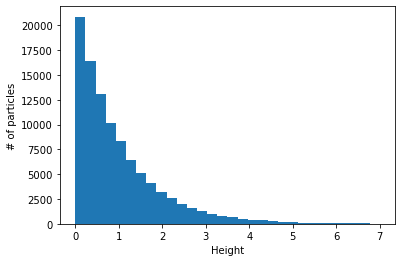

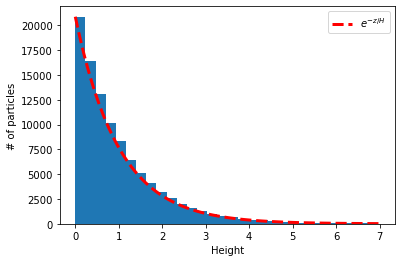

In [1]:
## Astro 204 HW2, question 2(a)
## 10/07/21 by Jiamu

import numpy as np
import matplotlib.pyplot as plt

# Set constants
H = 1 
n_nums = 10**5
nmin = 0  
nmax = 7*H
kept_nums = np.zeros(n_nums)

# Generate random numbers, using the code by Ruth
for i in range(n_nums):
    num = -1
    while(num == -1):  # keep picking random numbers until we get one we want to keep
        # np.random.random() gives a uniformly-distributed random number in the half-open interval [0,1)
        # first adjust this to the range of numbers that we want
        rand_num = np.random.random()*(nmax-nmin) + nmin  # this gives a random number uniformly distributed between nmin and nmax
        pkeep = np.exp(-rand_num)  # the probability that we want to keep the number we drew 
        # pick a uniformly distributed random number between 0 and 1 and if it's less than pkeep, keep the number
        # this means that the number had a probability pkeep of being kept
        if np.random.random() <= pkeep:
            num = rand_num
    
    # add our number to the list of kept numbers
    kept_nums[i] = num
print(len(kept_nums))
plt.hist(kept_nums, bins=30)
plt.xlabel('Height')
plt.ylabel('# of particles')
plt.show()
x = np.linspace(nmin,nmax,100)
norm_max = np.max(np.histogram(kept_nums, bins=30)[0])
fx = norm_max*np.exp(-x)
plt.hist(kept_nums, bins=30)
plt.plot(x,fx,'r',linewidth=3,ls='--',label='$e^{-z/H}$')
plt.legend()
plt.xlabel('Height')
plt.ylabel('# of particles')
plt.show()

In [2]:
## Astro 204 HW2, question 2(b)
## 10/08/21 by Jiamu

# impact parameter
b = 0.008
# generate evenly distributed photons
N = 2*10**4
x_gamma = np.random.random(N)
y_gamma = np.random.random(N)

# generate evenly distributed molecules
x_mol = np.random.random(n_nums)
y_mol = np.random.random(n_nums)

# having a collition means that the distance between photon and the air molecule 
# is less or equal to the impact parameter, b
# looping over photons
height_col=[]
for photon in range(N):
    dist = np.sqrt((x_gamma[photon]-x_mol)**2 + (y_gamma[photon]-y_mol)**2)
    # now finding the hight where collosions happen
    # picking the maximum height ---> the height of the FIRST interaction b/w photons and particles in the atmosphere
    kept_nums_col = np.max(kept_nums[dist < b])
    #print(len(kept_nums_col))
    height_col.append(kept_nums_col)
#height_col

After looking at the solutions, I realized that I did not take into account the photons that are not absorbed by atmosphere molecules and made it to the surface(height_col = 0). But it seems that the results are not that different...

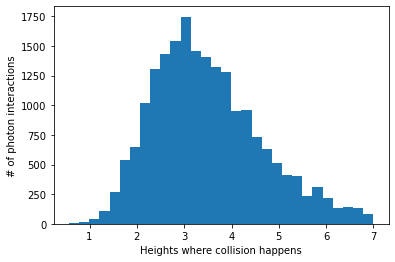

In [3]:
plt.hist(height_col, bins=30)
plt.xlabel('Heights where collision happens')
plt.ylabel('# of photon interactions')
plt.show()

In [4]:
## Astro 204 HW2, question 2(c)
## 10/10/21 by Jiamu

# neumerically, the number density is erqual to the number of particles b/c we can choose dV such that dV = H*dA = 1
lenn = []
for h in range(len(kept_nums)):
    n = kept_nums[h][kept_nums[h] > 3] # picking a number and counting the number of interactions above that hight
    # 3*H is approximately the hight where most photons interact w/ molecules
    lenn.append(n)
numb = [x for x in lenn if len(x) > 0]
# cross section
sigma = np.pi * b**2
print('total number of photons above 3*H =', len(numb))
print('optical depth tau =', sigma * len(numb))

total number of photons above 3*H = 4868
optical depth tau = 0.9787694744112072


After looking at the solutions, I realized I shouldn't use the total number of molecules above 3H to calculate the optical depth. The right way to do this is to approximate the number density at the surface as the total number of molecules less than scaleheight H divided by the volume(which is just unit volume if A=1 and H=1). Then calculate the number density using n = n_0 * e^(-3). Therefore the optical depth is just n * sigma * H.

Also, for a hight where not many photons are absorbed, pick h = H or h = 6H, according to the histogram above.